# 十分钟上手 Pandas

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. 产生 Pandas 对象

### Series

In [2]:
s = pd.Series(data=[1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### DataFrame

In [7]:
# 以时间序列作为索引
dates = pd.date_range('20130101', periods=7)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# 创建DataFrame，包含索引和列标
df = pd.DataFrame(np.random.randn(7,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,-1.087806
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463
2013-01-03,0.352240,0.342016,1.497679,-2.489989
2013-01-04,-0.070856,0.440071,1.647909,-0.896707
2013-01-05,0.897252,-0.336267,0.780662,0.618382
2013-01-06,0.009602,-0.155389,0.594689,-0.671733
2013-01-07,-1.799316,1.323456,-1.497059,-1.167356


In [12]:
# 以字典的方式引入数据
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=range(4),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 2. 查看数据

### 头尾数据

In [22]:
df.head(3)

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,-1.087806
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463
2013-01-03,0.352240,0.342016,1.497679,-2.489989


In [23]:
df.tail(3)

,A,B,C,D
2013-01-05,0.897252,-0.336267,0.780662,0.618382
2013-01-06,0.009602,-0.155389,0.594689,-0.671733
2013-01-07,-1.799316,1.323456,-1.497059,-1.167356


### 下标，列标，数据

In [24]:
df.index  # 索引

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07'],
              dtype='datetime64[ns]', freq='D')

In [25]:
df.columns  # 列标

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
df.values  # 数据

array([[ 1.1707109 ,  0.38027919,  0.49681548, -1.08780551],
       [-0.01374032,  0.95364641, -1.33778652, -0.69446329],
       [ 0.35224   ,  0.34201645,  1.49767867, -2.48998898],
       [-0.07085614,  0.44007063,  1.6479089 , -0.89670725],
       [ 0.8972517 , -0.33626742,  0.78066162,  0.61838214],
       [ 0.00960207, -0.15538902,  0.59468888, -0.671733  ],
       [-1.79931606,  1.32345634, -1.49705877, -1.16735612]])

### 统计数据

In [27]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,0.077985,0.421116,0.311844,-0.912810
std,0.957424,0.579091,1.259543,0.915925
min,-1.799316,-0.336267,-1.497059,-2.489989
25%,-0.042298,0.093314,-0.420486,-1.127581
50%,0.009602,0.380279,0.594689,-0.896707
75%,0.624746,0.696859,1.139170,-0.683098
max,1.170711,1.323456,1.647909,0.618382


### 转置

In [28]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00
A,1.170711,-0.013740,0.352240,-0.070856,0.897252,0.009602,-1.799316
B,0.380279,0.953646,0.342016,0.440071,-0.336267,-0.155389,1.323456
C,0.496815,-1.337787,1.497679,1.647909,0.780662,0.594689,-1.497059
D,-1.087806,-0.694463,-2.489989,-0.896707,0.618382,-0.671733,-1.167356


## 排序

In [29]:
df.sort_index(ascending=False)  # sort_index(axis=0, ascending=True)

,A,B,C,D
2013-01-07,-1.799316,1.323456,-1.497059,-1.167356
2013-01-06,0.009602,-0.155389,0.594689,-0.671733
2013-01-05,0.897252,-0.336267,0.780662,0.618382
2013-01-04,-0.070856,0.440071,1.647909,-0.896707
2013-01-03,0.352240,0.342016,1.497679,-2.489989
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463
2013-01-01,1.170711,0.380279,0.496815,-1.087806


In [30]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.087806,0.496815,0.380279,1.170711
2013-01-02,-0.694463,-1.337787,0.953646,-0.013740
2013-01-03,-2.489989,1.497679,0.342016,0.352240
2013-01-04,-0.896707,1.647909,0.440071,-0.070856
2013-01-05,0.618382,0.780662,-0.336267,0.897252
2013-01-06,-0.671733,0.594689,-0.155389,0.009602
2013-01-07,-1.167356,-1.497059,1.323456,-1.799316


In [31]:
df.sort_values(by="B")

,A,B,C,D
2013-01-05,0.897252,-0.336267,0.780662,0.618382
2013-01-06,0.009602,-0.155389,0.594689,-0.671733
2013-01-03,0.352240,0.342016,1.497679,-2.489989
2013-01-01,1.170711,0.380279,0.496815,-1.087806
2013-01-04,-0.070856,0.440071,1.647909,-0.896707
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463
2013-01-07,-1.799316,1.323456,-1.497059,-1.167356


## 3.  索引

### 读取数据

In [32]:
df["A"]

2013-01-01    1.170711
2013-01-02   -0.013740
2013-01-03    0.352240
2013-01-04   -0.070856
2013-01-05    0.897252
2013-01-06    0.009602
2013-01-07   -1.799316
Freq: D, Name: A, dtype: float64

In [33]:
df.A

2013-01-01    1.170711
2013-01-02   -0.013740
2013-01-03    0.352240
2013-01-04   -0.070856
2013-01-05    0.897252
2013-01-06    0.009602
2013-01-07   -1.799316
Freq: D, Name: A, dtype: float64

In [35]:
df[:3]  # 序号切片

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,-1.087806
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463
2013-01-03,0.352240,0.342016,1.497679,-2.489989


In [40]:
df.ix[:3]

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,-1.087806
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463
2013-01-03,0.352240,0.342016,1.497679,-2.489989


In [41]:
df["20130101":"20130103"]  # 索引切片

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,-1.087806
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463
2013-01-03,0.352240,0.342016,1.497679,-2.489989


In [42]:
df.loc["20130101":"20130103"]

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,-1.087806
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463
2013-01-03,0.352240,0.342016,1.497679,-2.489989


### 使用 `label` 索引

In [44]:
df.loc[dates[0]]

A    1.170711
B    0.380279
C    0.496815
D   -1.087806
Name: 2013-01-01 00:00:00, dtype: float64

In [46]:
df["20130101":"20130101"]

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,-1.087806


In [47]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.170711,0.380279
2013-01-02,-0.013740,0.953646
2013-01-03,0.352240,0.342016
2013-01-04,-0.070856,0.440071
2013-01-05,0.897252,-0.336267
2013-01-06,0.009602,-0.155389
2013-01-07,-1.799316,1.323456


In [49]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.013740,0.953646
2013-01-03,0.352240,0.342016
2013-01-04,-0.070856,0.440071


In [50]:
df.loc['20130102',['A','B']]

A   -0.013740
B    0.953646
Name: 2013-01-02 00:00:00, dtype: float64

In [51]:
df.loc[dates[0],'B']  # 标量值可以用 at，速度更快

0.38027918543360739

In [52]:
%timeit -n100 df.loc[dates[0],'B']
%timeit -n100 df.at[dates[0],'B']  # 速度更快

df.at[dates[0],'B']

35.8 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
28.2 µs ± 6.14 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


0.38027918543360739

### 使用位置索引

In [54]:
df

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,-1.087806
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463
2013-01-03,0.352240,0.342016,1.497679,-2.489989
2013-01-04,-0.070856,0.440071,1.647909,-0.896707
2013-01-05,0.897252,-0.336267,0.780662,0.618382
2013-01-06,0.009602,-0.155389,0.594689,-0.671733
2013-01-07,-1.799316,1.323456,-1.497059,-1.167356


In [53]:
df.iloc[3]

A   -0.070856
B    0.440071
C    1.647909
D   -0.896707
Name: 2013-01-04 00:00:00, dtype: float64

In [55]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.070856,0.440071
2013-01-05,0.897252,-0.336267


In [56]:
df.iloc[[1,2,4],[0,2]]  # 不连续的索引

,A,C
2013-01-02,-0.013740,-1.337787
2013-01-03,0.352240,1.497679
2013-01-05,0.897252,0.780662


In [57]:
df.iloc[1:3,:]  # 整行

,A,B,C,D
2013-01-02,-0.01374,0.953646,-1.337787,-0.694463
2013-01-03,0.35224,0.342016,1.497679,-2.489989


In [58]:
df.iloc[:, 1:3]  # 整列

,B,C
2013-01-01,0.380279,0.496815
2013-01-02,0.953646,-1.337787
2013-01-03,0.342016,1.497679
2013-01-04,0.440071,1.647909
2013-01-05,-0.336267,0.780662
2013-01-06,-0.155389,0.594689
2013-01-07,1.323456,-1.497059


In [59]:
df.iloc[1,1]  # 标量

0.95364640732254324

In [60]:
%timeit -n100 df.iloc[1,1]
%timeit -n100 df.iat[1,1]  # 速度更快

df.iat[1,1]

20.2 µs ± 9.43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.8 µs ± 344 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


0.95364640732254324

### 布尔型索引

In [61]:
df

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,-1.087806
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463
2013-01-03,0.352240,0.342016,1.497679,-2.489989
2013-01-04,-0.070856,0.440071,1.647909,-0.896707
2013-01-05,0.897252,-0.336267,0.780662,0.618382
2013-01-06,0.009602,-0.155389,0.594689,-0.671733
2013-01-07,-1.799316,1.323456,-1.497059,-1.167356


In [62]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,-1.087806
2013-01-03,0.352240,0.342016,1.497679,-2.489989
2013-01-05,0.897252,-0.336267,0.780662,0.618382
2013-01-06,0.009602,-0.155389,0.594689,-0.671733


In [63]:
df[df > 0]

,A,B,C,D
2013-01-01,1.170711,0.380279,0.496815,NaN
2013-01-02,NaN,0.953646,NaN,NaN
2013-01-03,0.352240,0.342016,1.497679,NaN
2013-01-04,NaN,0.440071,1.647909,NaN
2013-01-05,0.897252,NaN,0.780662,0.618382
2013-01-06,0.009602,NaN,0.594689,NaN
2013-01-07,NaN,1.323456,NaN,NaN


In [66]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three', 'one']
df2

,A,B,C,D,E
2013-01-01,1.170711,0.380279,0.496815,-1.087806,one
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463,one
2013-01-03,0.352240,0.342016,1.497679,-2.489989,two
2013-01-04,-0.070856,0.440071,1.647909,-0.896707,three
2013-01-05,0.897252,-0.336267,0.780662,0.618382,four
2013-01-06,0.009602,-0.155389,0.594689,-0.671733,three
2013-01-07,-1.799316,1.323456,-1.497059,-1.167356,one


In [67]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.352240,0.342016,1.497679,-2.489989,two
2013-01-05,0.897252,-0.336267,0.780662,0.618382,four


### 设定数据的值

In [69]:
s = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [70]:
df['F'] = s
df

,A,B,C,D,F
2013-01-01,1.170711,0.380279,0.496815,-1.087806,NaN
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463,1.0
2013-01-03,0.352240,0.342016,1.497679,-2.489989,2.0
2013-01-04,-0.070856,0.440071,1.647909,-0.896707,3.0
2013-01-05,0.897252,-0.336267,0.780662,0.618382,4.0
2013-01-06,0.009602,-0.155389,0.594689,-0.671733,5.0
2013-01-07,-1.799316,1.323456,-1.497059,-1.167356,6.0


In [71]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.380279,0.496815,-1.087806,NaN
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463,1.0
2013-01-03,0.352240,0.342016,1.497679,-2.489989,2.0
2013-01-04,-0.070856,0.440071,1.647909,-0.896707,3.0
2013-01-05,0.897252,-0.336267,0.780662,0.618382,4.0
2013-01-06,0.009602,-0.155389,0.594689,-0.671733,5.0
2013-01-07,-1.799316,1.323456,-1.497059,-1.167356,6.0


In [72]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.496815,-1.087806,NaN
2013-01-02,-0.013740,0.953646,-1.337787,-0.694463,1.0
2013-01-03,0.352240,0.342016,1.497679,-2.489989,2.0
2013-01-04,-0.070856,0.440071,1.647909,-0.896707,3.0
2013-01-05,0.897252,-0.336267,0.780662,0.618382,4.0
2013-01-06,0.009602,-0.155389,0.594689,-0.671733,5.0
2013-01-07,-1.799316,1.323456,-1.497059,-1.167356,6.0


In [73]:
df.loc[:,'D'] = np.array([5] * len(df))  # 整列
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.496815,5,NaN
2013-01-02,-0.013740,0.953646,-1.337787,5,1.0
2013-01-03,0.352240,0.342016,1.497679,5,2.0
2013-01-04,-0.070856,0.440071,1.647909,5,3.0
2013-01-05,0.897252,-0.336267,0.780662,5,4.0
2013-01-06,0.009602,-0.155389,0.594689,5,5.0
2013-01-07,-1.799316,1.323456,-1.497059,5,6.0


In [75]:
df2 = df.copy()
df2[df2 > 0] = -df2  # 大于0的数全部变成负数，元素级别的操作
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.496815,-5,NaN
2013-01-02,-0.013740,-0.953646,-1.337787,-5,-1.0
2013-01-03,-0.352240,-0.342016,-1.497679,-5,-2.0
2013-01-04,-0.070856,-0.440071,-1.647909,-5,-3.0
2013-01-05,-0.897252,-0.336267,-0.780662,-5,-4.0
2013-01-06,-0.009602,-0.155389,-0.594689,-5,-5.0
2013-01-07,-1.799316,-1.323456,-1.497059,-5,-6.0


## 4. 缺失数据

In [76]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.496815,5,NaN,NaN
2013-01-02,-0.013740,0.953646,-1.337787,5,1.0,NaN
2013-01-03,0.352240,0.342016,1.497679,5,2.0,NaN
2013-01-04,-0.070856,0.440071,1.647909,5,3.0,NaN


In [77]:
# df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.496815,5,NaN,1.0
2013-01-02,-0.013740,0.953646,-1.337787,5,1.0,1.0
2013-01-03,0.352240,0.342016,1.497679,5,2.0,NaN
2013-01-04,-0.070856,0.440071,1.647909,5,3.0,NaN


In [78]:
df1.dropna(how='any')  # 丢弃所有缺失行

,A,B,C,D,F,E
2013-01-02,-0.01374,0.953646,-1.337787,5,1.0,1.0


In [80]:
df1.dropna()

,A,B,C,D,F,E
2013-01-02,-0.01374,0.953646,-1.337787,5,1.0,1.0


In [81]:
df1.fillna(value=5)  # 填充缺失

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.496815,5,5.0,1.0
2013-01-02,-0.013740,0.953646,-1.337787,5,1.0,1.0
2013-01-03,0.352240,0.342016,1.497679,5,2.0,5.0
2013-01-04,-0.070856,0.440071,1.647909,5,3.0,5.0


In [82]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.496815,5,NaN,1.0
2013-01-02,-0.013740,0.953646,-1.337787,5,1.0,1.0
2013-01-03,0.352240,0.342016,1.497679,5,2.0,NaN
2013-01-04,-0.070856,0.440071,1.647909,5,3.0,NaN


In [83]:
pd.isnull(df1)  # 检查缺失

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 5. 计算操作

### 统计信息

In [84]:
df.mean()  # 列均值

A   -0.089260
B    0.366790
C    0.311844
D    5.000000
F    3.500000
dtype: float64

In [85]:
df.mean(1)  # 行均值

2013-01-01    1.374204
2013-01-02    1.120424
2013-01-03    1.838387
2013-01-04    2.003425
2013-01-05    2.068329
2013-01-06    2.089780
2013-01-07    1.805416
Freq: D, dtype: float64

In [87]:
s = pd.Series([1,3,5,np.nan,6,8, 10], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
2013-01-07    6.0
Freq: D, dtype: float64

In [88]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.496815,5,NaN
2013-01-02,-0.013740,0.953646,-1.337787,5,1.0
2013-01-03,0.352240,0.342016,1.497679,5,2.0
2013-01-04,-0.070856,0.440071,1.647909,5,3.0
2013-01-05,0.897252,-0.336267,0.780662,5,4.0
2013-01-06,0.009602,-0.155389,0.594689,5,5.0
2013-01-07,-1.799316,1.323456,-1.497059,5,6.0


In [89]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.647760,-0.657984,0.497679,4.0,1.0
2013-01-04,-3.070856,-2.559929,-1.352091,2.0,0.0
2013-01-05,-4.102748,-5.336267,-4.219338,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN
2013-01-07,-7.799316,-4.676544,-7.497059,-1.0,0.0


### apply 操作

In [90]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.496815,5,NaN
2013-01-02,-0.013740,0.953646,-1.337787,5,1.0
2013-01-03,0.352240,0.342016,1.497679,5,2.0
2013-01-04,-0.070856,0.440071,1.647909,5,3.0
2013-01-05,0.897252,-0.336267,0.780662,5,4.0
2013-01-06,0.009602,-0.155389,0.594689,5,5.0
2013-01-07,-1.799316,1.323456,-1.497059,5,6.0


In [92]:
df.apply(np.cumsum)  # 列累加

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.496815,5,NaN
2013-01-02,-0.013740,0.953646,-0.840971,10,1.0
2013-01-03,0.338500,1.295663,0.656708,15,3.0
2013-01-04,0.267644,1.735733,2.304617,20,6.0
2013-01-05,1.164895,1.399466,3.085278,25,10.0
2013-01-06,1.174497,1.244077,3.679967,30,15.0
2013-01-07,-0.624819,2.567533,2.182908,35,21.0


In [93]:
df.apply(lambda x: x.max() - x.min())

A    2.696568
B    1.659724
C    3.144968
D    0.000000
F    5.000000
dtype: float64

In [94]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.496815,5,NaN
2013-01-02,-0.013740,0.953646,-1.337787,5,1.0
2013-01-03,0.352240,0.342016,1.497679,5,2.0
2013-01-04,-0.070856,0.440071,1.647909,5,3.0
2013-01-05,0.897252,-0.336267,0.780662,5,4.0
2013-01-06,0.009602,-0.155389,0.594689,5,5.0
2013-01-07,-1.799316,1.323456,-1.497059,5,6.0


### 直方图

In [96]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    1
2    4
3    3
4    3
5    0
6    1
7    1
8    2
9    2
dtype: int64

In [102]:
s.value_counts()  # 直方图信息

1    3
4    2
3    2
2    2
0    1
dtype: int64

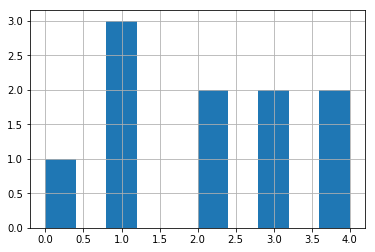

In [99]:
h = s.hist()

### 字符串方法

In [103]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6. 合并

### 连接

In [107]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.449604,0.030502,0.143896,-0.461533
1,1.937222,-0.898646,1.503151,-0.445768
2,2.077299,-1.276938,0.793972,0.431377
3,0.740419,-2.061938,1.180599,1.325505
4,-1.191203,1.116347,-1.662318,1.448193
5,-0.717234,0.605852,-0.408422,-0.497192
6,-0.950575,0.928619,-0.620232,0.245246
7,-0.164842,1.629856,-0.465763,0.439824
8,0.057020,-0.478224,1.090225,-1.285296
9,0.037755,0.766913,1.269148,-2.193974


In [108]:
df[:2]

,0,1,2,3
0,1.449604,0.030502,0.143896,-0.461533
1,1.937222,-0.898646,1.503151,-0.445768


In [109]:
df[4:5]

,0,1,2,3
4,-1.191203,1.116347,-1.662318,1.448193


In [110]:
df[7:]

,0,1,2,3
7,-0.164842,1.629856,-0.465763,0.439824
8,0.057020,-0.478224,1.090225,-1.285296
9,0.037755,0.766913,1.269148,-2.193974


In [111]:
pieces = [df[:2], df[4:5], df[7:]]
pd.concat(pieces)  # 将多个 `pandas` 对象进行连接

,0,1,2,3
0,1.449604,0.030502,0.143896,-0.461533
1,1.937222,-0.898646,1.503151,-0.445768
4,-1.191203,1.116347,-1.662318,1.448193
7,-0.164842,1.629856,-0.465763,0.439824
8,0.057020,-0.478224,1.090225,-1.285296
9,0.037755,0.766913,1.269148,-2.193974


### 数据库中的 Join 合并

In [112]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [113]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [114]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### append 添加数据

In [115]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.228766,-0.094687,-0.799425,-1.471208
1,-0.457532,0.212032,-0.506176,1.086832
2,-0.757778,-1.691947,1.119507,-0.752646
3,0.897477,-0.207534,0.127734,1.349310
4,-0.595592,1.904545,1.750291,0.252266
5,0.055228,0.390292,0.303851,-0.116767
6,-0.720447,-0.417679,1.302981,-0.418731
7,-0.892849,1.097940,-0.297376,-0.469327


In [118]:
s = df.iloc[3]
s

A    0.897477
B   -0.207534
C    0.127734
D    1.349310
Name: 3, dtype: float64

In [119]:
# s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.228766,-0.094687,-0.799425,-1.471208
1,-0.457532,0.212032,-0.506176,1.086832
2,-0.757778,-1.691947,1.119507,-0.752646
3,0.897477,-0.207534,0.127734,1.349310
4,-0.595592,1.904545,1.750291,0.252266
5,0.055228,0.390292,0.303851,-0.116767
6,-0.720447,-0.417679,1.302981,-0.418731
7,-0.892849,1.097940,-0.297376,-0.469327
8,0.897477,-0.207534,0.127734,1.349310


### Grouping 分组

In [120]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.801050,-0.434180
1,bar,one,-0.391196,-0.890433
2,foo,two,0.391550,-0.951679
3,bar,three,-0.653715,-0.236649
4,foo,two,-0.561599,-0.602833
5,bar,two,0.438446,-0.522012
6,foo,one,-0.489323,-0.247407
7,foo,three,0.645636,0.255450


In [121]:
df.groupby('A').sum()  # 分组汇总

,C,D
A,,
bar,-0.606466,-1.649094
foo,-0.814786,-1.980649


In [122]:
df.groupby(['A', 'B']).sum()  # 分组汇总

C         D
A   B                        
bar one   -0.391196 -0.890433
    three -0.653715 -0.236649
    two    0.438446 -0.522012
foo one   -1.290373 -0.681587
    three  0.645636  0.255450
    two   -0.170049 -1.554512

## 7. 改变形状

### Stack

In [ ]:
# 多个索引
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

In [ ]:
df2 = df[:4]
df2

In [ ]:
stacked = df2.stack()
stacked

In [ ]:
type(stacked)

In [ ]:
stacked.unstack()  #  将最后一级 index 放回 colum

In [ ]:
stacked.unstack(1)

## 8. 时间序列

In [125]:
dates = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
dates

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [128]:
pd.Series(np.random.randn(len(dates)), dates)

2012-03-06   -0.281042
2012-03-07   -0.841018
2012-03-08   -2.382947
2012-03-09   -0.414169
2012-03-10   -0.135441
Freq: D, dtype: float64

In [127]:
s = pd.Series(data=np.random.randn(len(dates)), index=dates)
s

2012-03-06    0.061701
2012-03-07    0.948586
2012-03-08    0.755765
2012-03-09   -0.383958
2012-03-10    0.419516
Freq: D, dtype: float64

In [129]:
s_utc = s.tz_localize('UTC')  # 标准时间表示
s_utc

2012-03-06 00:00:00+00:00    0.061701
2012-03-07 00:00:00+00:00    0.948586
2012-03-08 00:00:00+00:00    0.755765
2012-03-09 00:00:00+00:00   -0.383958
2012-03-10 00:00:00+00:00    0.419516
Freq: D, dtype: float64

In [130]:
s_utc.tz_convert('US/Eastern')  # 改变时区表示

2012-03-05 19:00:00-05:00    0.061701
2012-03-06 19:00:00-05:00    0.948586
2012-03-07 19:00:00-05:00    0.755765
2012-03-08 19:00:00-05:00   -0.383958
2012-03-09 19:00:00-05:00    0.419516
Freq: D, dtype: float64

## 9. 数据分类统计

In [131]:
# df = pd.DataFrame({'id':[1,2,3,4,5,6], 'raw_grade':['a', 'b', 'b', 'a', 'a', 'e']})  # 创建数据
df = pd.DataFrame({'序号':[1,2,3,4,5,6], '等级':['a', 'b', 'b', 'a', 'a', 'e']})  # 创建数据
df

,序号,等级
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [132]:
df['类别'] = df['等级'].astype('category')  # 通过 原数列 产生 新的类别数列
df['类别']

0    a
1    b
2    b
3    a
4    a
5    e
Name: 类别, dtype: category
Categories (3, object): [a, b, e]

In [133]:
df['等级']  # 原数列，作为对比

0    a
1    b
2    b
3    a
4    a
5    e
Name: 等级, dtype: object

In [134]:
df['类别'].cat.categories = ['很好', '好', '很差']  # 类别 设值
df['类别']

0    很好
1     好
2     好
3    很好
4    很好
5    很差
Name: 类别, dtype: category
Categories (3, object): [很好, 好, 很差]

In [135]:
df['类别'] = df['类别'].cat.set_categories(['很差', '差', '中等', '好', '很好'])  # 添加缺失的类别
df['类别']

0    很好
1     好
2     好
3    很好
4    很好
5    很差
Name: 类别, dtype: category
Categories (5, object): [很差, 差, 中等, 好, 很好]

In [136]:
df.groupby(by='类别').size()  # 分组

类别
很差    1
差     0
中等    0
好     2
很好    3
dtype: int64

In [137]:
df.groupby(by='等级').size()

等级
a    3
b    2
e    1
dtype: int64

## 10. 绘图

In [138]:
plt.style.use('ggplot')  # 绘图风格（背景）

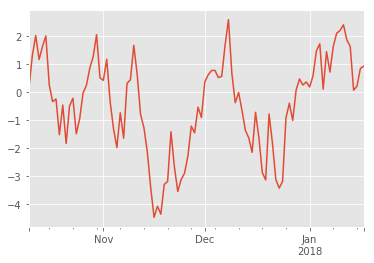

In [139]:
s = pd.Series(np.random.randn(100), index=pd.date_range('10/10/2017', periods=100))
s.cumsum().plot()  # 累加，数据漫步

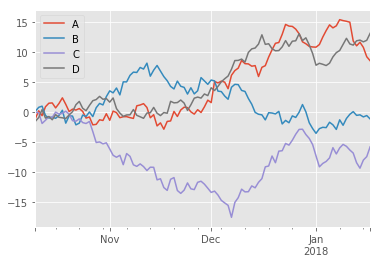

In [141]:
df = pd.DataFrame(np.random.randn(100, 4), index=s.index, columns=['A', 'B', 'C', 'D'])  # 创建数据
df.cumsum().plot()  # 数据累加
# plt.legend(loc="best")  # 图例设置

## 11. 文件读写

### csv

In [142]:
df = pd.DataFrame(np.random.randn(5, 4), index=list('abcde'), columns=list('ABCD'))  # 创建数据
df

,A,B,C,D
a,-2.384179,0.365513,-0.825075,0.899545
b,-1.096894,-1.143327,-0.875703,0.208970
c,2.038610,0.424350,1.675773,1.095026
d,1.064927,0.543794,2.053840,-0.807253
e,0.162979,0.395412,0.284322,-1.112349


In [143]:
df.to_csv(path_or_buf='测试数据.csv')

In [144]:
pd.read_csv(filepath_or_buffer='测试数据.csv')

,Unnamed: 0,A,B,C,D
0,a,-2.384179,0.365513,-0.825075,0.899545
1,b,-1.096894,-1.143327,-0.875703,0.208970
2,c,2.038610,0.424350,1.675773,1.095026
3,d,1.064927,0.543794,2.053840,-0.807253
4,e,0.162979,0.395412,0.284322,-1.112349


### hdf5

In [ ]:
# Hierarchical Data Format，可以存储不同类型的图像和数码数据的文件格式。
# 很多大型机构的数据存储格式都采用了HDF5。
# 缺点：
# HDF5没有强制使用UTF8编码，因此为了兼容型只好采用ASCII编码
# 必须使用外部工具（如h5repack）来读取数据

In [145]:
df = pd.DataFrame(np.random.randn(5, 4), index=list('abcde'), columns=list('ABCD'))  # 创建数据
df

,A,B,C,D
a,0.808869,0.745217,-1.449647,-1.136680
b,1.507894,-1.082811,-0.190591,-0.399841
c,-1.033547,-1.031890,0.991171,0.984964
d,-0.669825,-1.374997,-0.719441,-1.407361
e,1.845234,0.154564,0.030686,-0.097705


In [146]:
df.to_hdf(path_or_buf='测试数据.h5', key='df')

In [147]:
pd.read_hdf(path_or_buf='测试数据.h5',key='df')

,A,B,C,D
a,0.808869,0.745217,-1.449647,-1.136680
b,1.507894,-1.082811,-0.190591,-0.399841
c,-1.033547,-1.031890,0.991171,0.984964
d,-0.669825,-1.374997,-0.719441,-1.407361
e,1.845234,0.154564,0.030686,-0.097705


### excel

In [148]:
df = pd.DataFrame(np.random.randn(5, 4), index=list('abcde'), columns=list('ABCD'))  # 创建数据
df

,A,B,C,D
a,-0.114885,0.814694,0.273363,-0.216328
b,1.123370,0.273317,-0.134602,0.111235
c,0.337828,1.450065,0.012260,0.470899
d,1.372986,-1.631314,1.748864,0.571963
e,-0.247727,0.884727,0.290206,0.191539


In [150]:
df.iat[1,1] = None  # 修改数据
df.at['d', 'A'] = None
df

,A,B,C,D
a,-0.114885,0.814694,0.273363,-0.216328
b,1.123370,NaN,-0.134602,0.111235
c,0.337828,1.450065,0.012260,0.470899
d,NaN,-1.631314,1.748864,0.571963
e,-0.247727,0.884727,0.290206,0.191539


In [151]:
df.to_excel(excel_writer='测试数据.xlsx', sheet_name='表格1')  # 写入Excel

In [152]:
pd.read_excel(io='测试数据.xlsx', sheetname='表格1')  # 读取Excel

,A,B,C,D
a,-0.114885,0.814694,0.273363,-0.216328
b,1.123370,NaN,-0.134602,0.111235
c,0.337828,1.450065,0.012260,0.470899
d,NaN,-1.631314,1.748864,0.571963
e,-0.247727,0.884727,0.290206,0.191539


### 清理临时文件

In [153]:
import glob
import os

if glob.glob('测试数据*'):  # 返回的是个列表
    for filename in glob.glob('测试数据*'):  # 在python中,glob模块是用来查找匹配的文件的
        print(filename)
        os.remove(filename)
else:
    print('临时文件不存在')

测试数据.csv
测试数据.h5
测试数据.xlsx
